In [136]:
from bayesian_optimization import BayesianOptimization
import pandas as pd 
from botorch.test_functions import Ackley
from botorch.test_functions import Levy 
from botorch.test_functions import Rosenbrock
from varstool import DVARS
import seaborn as sns
import matplotlib.pyplot as plt

# Variables that determine the size of the dataset
N_INITIAL = 5
EPOCHS = 5
BATCH_SIZE = 5
DIM = 5
LOWER = -10
UPPER = 10

optimizer = BayesianOptimization(fun=Levy(dim=DIM,negate=True), 
                                 batch_size=BATCH_SIZE, 
                                 dim=DIM, 
                                 epochs=EPOCHS, 
                                 n_init=N_INITIAL, 
                                 lower_bound=LOWER,
                                 upper_bound=UPPER,
                                 seed=3,
                                 acqf_type='qUCB')

x_max, y_max = optimizer.run()
data = optimizer.get_data()
full = optimizer.format(data, dim=DIM, n_init=N_INITIAL, batch_size=BATCH_SIZE, epochs=EPOCHS)
display(full)

vars_data = full.drop(columns=['Batch'])

display(vars_data)
vars_data.to_csv('vars_data.csv', index=False)
h = 0.3
experiment = DVARS(data_file = 'vars_data.csv',
                   outvarname = 'y',
                   ivars_range = h,
                   phi0=1,
                   phi_max=1e6,
                   tol = 1e-6,
                   correlation_func_type='linear',
                   report_verbose=False)

experiment.run()
display(experiment.ratios)

,Batch,x1,x2,x3,x4,x5,y
0,0.0,-8.630697,-5.509461,3.983704,-8.748286,-2.492096,-47.619815
1,0.0,7.928715,4.555075,-4.566916,1.844722,0.107493,-11.526207
2,0.0,3.533008,-4.727101,5.405836,-2.444412,9.554826,-33.741319
3,0.0,-2.987414,5.022799,-6.072011,8.061354,-7.874569,-64.940859
4,0.0,-2.371866,-0.715717,-0.867669,7.222207,-6.502860,-20.341702
5,1.0,9.181533,2.719103,-5.517741,2.158750,1.962127,-61.795242
6,1.0,6.965378,2.244209,-2.553390,2.217776,0.045881,-20.492462
7,1.0,9.949188,4.851367,-2.332874,2.869627,0.516340,-69.183241
8,1.0,8.013968,5.027688,-3.526092,0.285323,2.452279,-18.996191
9,1.0,9.532521,3.306730,-4.080624,-0.197584,-1.220662,-52.264671


,x1,x2,x3,x4,x5,y
0,-8.630697,-5.509461,3.983704,-8.748286,-2.492096,-47.619815
1,7.928715,4.555075,-4.566916,1.844722,0.107493,-11.526207
2,3.533008,-4.727101,5.405836,-2.444412,9.554826,-33.741319
3,-2.987414,5.022799,-6.072011,8.061354,-7.874569,-64.940859
4,-2.371866,-0.715717,-0.867669,7.222207,-6.502860,-20.341702
5,9.181533,2.719103,-5.517741,2.158750,1.962127,-61.795242
6,6.965378,2.244209,-2.553390,2.217776,0.045881,-20.492462
7,9.949188,4.851367,-2.332874,2.869627,0.516340,-69.183241
8,8.013968,5.027688,-3.526092,0.285323,2.452279,-18.996191
9,9.532521,3.306730,-4.080624,-0.197584,-1.220662,-52.264671


,x1,x2,x3,x4,x5
0.3,0.562298,0.176081,0.099414,0.162207,0.0


In [138]:
from botorch.test_functions import Levy
import torch
DIM = 5
LOWER = -10
UPPER = 10
N = 100
fun=Levy(dim=DIM,negate=True)

fun.bounds[0, :].fill_(LOWER) # Bounds of the function
fun.bounds[1, :].fill_(UPPER)

samples = (UPPER - LOWER) * torch.rand(N, DIM) + LOWER
y_values = torch.tensor([fun(sample) for sample in samples])

data = {
    'x1': samples[:, 0].numpy(),
    'x2': samples[:, 1].numpy(),
    'x3': samples[:, 0].numpy(),
    'x4': samples[:, 1].numpy(),
    'x5': samples[:, 1].numpy(),
    'y': y_values.numpy()
}
vars_df = pd.DataFrame(data)

vars_df.to_csv('vars_data_true.csv', index=False)
h = 0.3
experiment = DVARS(data_file = 'vars_data_true.csv',
                   outvarname = 'y',
                   ivars_range = h,
                   phi0=1,
                   phi_max=1e6,
                   tol = 1e-6,
                   correlation_func_type='linear',
                   report_verbose=False)

experiment.run()
display(experiment.ratios)

,x1,x2,x3,x4,x5
0.3,0.19943,0.200361,0.199429,0.200395,0.200386


In [140]:
DIM = 5
LOWER = -10
UPPER = 10

# Initialize the Levy function
fun = Levy(dim=DIM, negate=True)
fun.bounds[0, :].fill_(LOWER)  # Bounds of the function
fun.bounds[1, :].fill_(UPPER)

def wrapped_levy_function(x):
    tensor_input = torch.tensor(x.values, dtype=torch.float32)
    
    if tensor_input.dim() == 1:
        tensor_input = tensor_input.unsqueeze(0)
    
    result = fun(tensor_input)
    
    return result.item()


df = pd.DataFrame([[1, 1, 1, 1, 1]], columns=['x1', 'x2', 'x3', 'x4', 'x5'])
output = wrapped_levy_function(df)
print(output)

-7.64274186065882e-15


In [141]:
import numpy as np
import pandas as pd
from varstool import VARS, Model

my_parameters = { 'x1': [ -10, 10 ], 
                  'x2': [ -10, 10 ],
                  'x3': [ -10, 10 ], 
                  'x4': [ -10, 10 ], 
                  'x5': [ -10, 10 ], }


levy_model = Model(wrapped_levy_function)

# Initialize the VARS object
experiment_1 = VARS(parameters     = my_parameters,
                    num_stars      = 100,
                    delta_h        = 0.1,
                    ivars_scales   = (0.1, 0.3, 0.5),
                    sampler        = 'rnd',
                    seed           = 123456789,
                    model          = levy_model,
                    bootstrap_flag = True,
                    bootstrap_size = 100,
                    bootstrap_ci   = 0.9,
                    report_verbose = True,
                    )

# Run the analysis
experiment_1.run_online()

bootstrapping: 100%|██████████| 100/100 [00:30<00:00,  3.25it/s]
/Users/dylanschubert/anaconda3/envs/msc_project/lib/python3.12/site-packages/varstool/sensitivity_analysis/vars_funcs.py:989: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  result_bs_sobol_ranking[param].eq(st_factor_ranking[param][0]).sum() / bootstrap_size)


In [142]:
import matplotlib.pyplot as plt
cols = experiment_1.parameters.keys()
experiment_1.ivars[cols]

,x1,x2,x3,x4,x5
0.1,9.130710,8.616637,10.256851,9.028948,0.106452
0.3,46.016183,44.418316,49.897988,45.820597,1.491669
0.5,112.518639,109.663830,120.678178,112.511348,4.600711


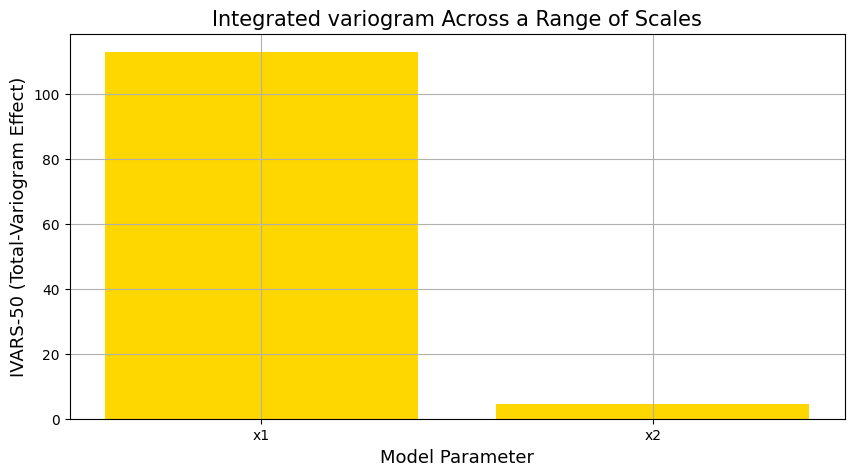

In [135]:

# Plot IVARS from Experiment 1
ivars_scale = 0.5 # Choose the scale range of interest, e.g., 0.1, 0.3, or 0.5

cols = experiment_1.parameters.keys()                     
fig_bar = plt.figure(figsize=(10,5))
plt.gca().bar(cols, experiment_1.ivars.loc[pd.IndexSlice[ ivars_scale ]][cols], color='gold')
plt.gca().set_title (r'Integrated variogram Across a Range of Scales', fontsize = 15)
plt.gca().set_ylabel(r'IVARS-50 (Total-Variogram Effect)', fontsize = 13)
plt.gca().set_xlabel(r'Model Parameter', fontsize=13)
plt.gca().grid()
plt.gca().set_yscale('linear')